# 0. Introduction

### This document shows the performance of reanalysis before and after merging using a two-layer cross-validation.
To save the time, this is based on 20% of all stations.

### The merging weight is calculated using Bayesian Model Averaging

### Brief conclusions:  
...

# 1. Load modules and files

In [1]:
import numpy as np
import auxiliary as au
import pandas
from matplotlib import pyplot as plt
import tabulate

def cal_statiscs(file_stn, file_reamerge, var):
    # load station data
    d1=np.load(file_stn)
    stn_lle=d1['stn_lle']
    stndata=d1[var+'_stn']
    stndata[np.nanmean(stndata,axis=1)==0,:]=np.nan
    nstn,ntimes=np.shape(stndata)
    reanum = 4
    
    # load downscaled data
    downdata=np.nan*np.zeros([reanum,nstn,ntimes], dtype=np.float32)
    d2=np.load(file_reamerge)
    downdata[0:3]=d2['reacorr_stn']
    downdata[3]=d2['reamerge_stn']
    
    # calculate the metrics for each station
    met_prcp=np.nan * np.zeros([reanum,nstn,4])
    for i in range(nstn):
        if np.isnan(stndata[i,0]):
            continue
        for r in range(reanum):
            met_prcp[r,i,:] = au.metric(stndata[i],downdata[r,i,:])

    mean_prcp = np.zeros([nstn,reanum+1])
    mean_prcp[:,0] = np.nanmean(stndata, axis=1)
    for i in range(reanum):
        mean_prcp[:,i+1]=np.nanmean(downdata[i], axis=1)
    return met_prcp, mean_prcp

file_stn='/Users/localuser/Research/EMDNA/stndata_whole.npz'
file_reamerge='/Users/localuser/Research/EMDNA/merge/mergecorr_stn_prcp_BMA.npz'
met_prcp, mean_prcp = cal_statiscs(file_stn, file_reamerge, 'prcp')

# lle
d1=np.load(file_stn)
stn_lle=d1['stn_lle']
del d1

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/localuser/Github/PyGMET/auxiliary.py:150: RuntimeWarning: Mean of empty slice
  metout[1] = np.n

In [23]:
np.where(met_prcp[3,:,1]<met_prcp[2,:,1]-3)

(array([3350, 3380, 3395]),)

In [25]:
print(met_prcp[:,3350,1])
print(stn_lle[3350])

[-1.34947574 -1.400123   -1.35891223 -4.59047651]
[ 14.9833 -92.15   479.8   ]


# 2. Spatial distribution of station and downscaled data

## 2.1 Precipitation

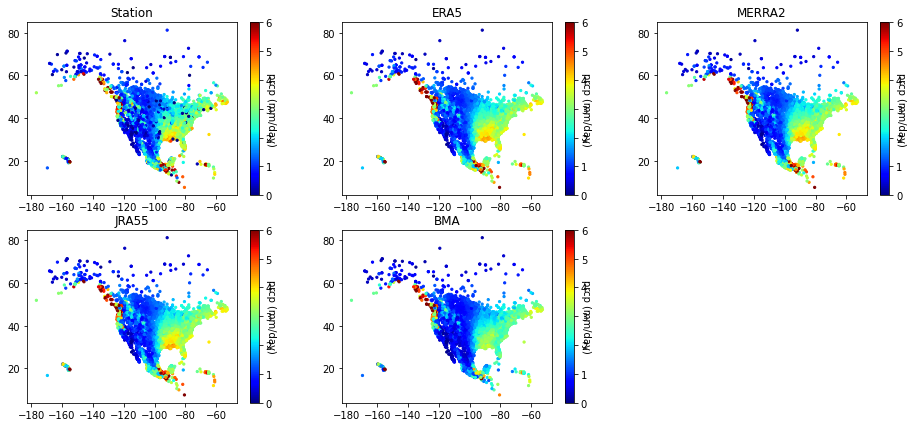

In [7]:
dplot = mean_prcp
titles=['Station','ERA5','MERRA2','JRA55','BMA']
plt.figure(figsize=[16,7])
for i in range(len(titles)):
    plt.subplot(2,3,i+1)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[:,i],cmap='jet')
    cbar = plt.colorbar()
    cbar.set_label('prcp (mm/day)', rotation=270)
    plt.clim([0,6])
    plt.title(titles[i])

## 2.2 Tmean

In [ ]:
dplot = mean_tmean
titles=['Station','Raw','QM','Add_Climo']
plt.figure(figsize=[14,10])
for i in range(len(titles)):
    plt.subplot(2,2,i+1)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[:,i],cmap='jet')
    cbar = plt.colorbar()
    cbar.set_label('temperature (C)', rotation=270)
    plt.clim([-10,30])
    plt.title(titles[i])

## 2.3 Trange

In [ ]:
dplot = mean_trange
titles=['Station','Raw','QM','Add_Climo']
plt.figure(figsize=[14,10])
for i in range(len(titles)):
    plt.subplot(2,2,i+1)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[:,i],cmap='jet')
    cbar = plt.colorbar()
    cbar.set_label('temperature (C)', rotation=270)
    plt.clim([0,20])
    plt.title(titles[i])

# 3. Accuracy Evaluation

## Note: for this part, we should look more at distribution because the mean/median values are largely determined by stations in plain regions where the station number is very large

## 3.1 Precipitation

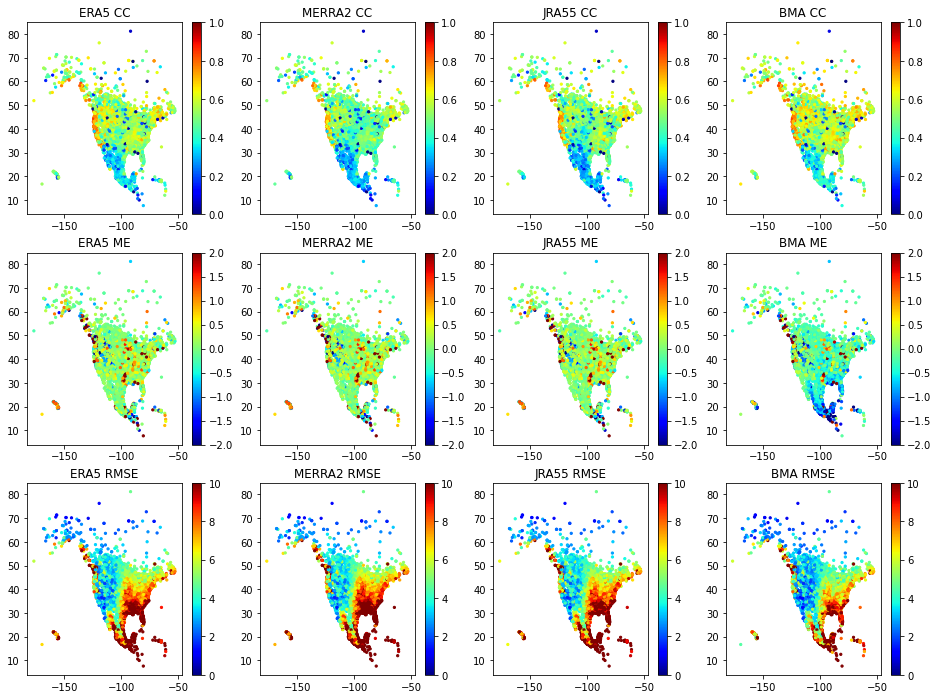

In [15]:
dplot=met_prcp
titles=['ERA5','MERRA2','JRA55','BMA']
plt.figure(figsize=[16,12])
for i in range(len(titles)):
    plt.subplot(3,4,i+1)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[i,:,0],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([0,1])
    plt.title(titles[i]+' CC')
    
    plt.subplot(3,4,i+5)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[i,:,1],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([-2, 2])
    plt.title(titles[i]+' ME')
    
    plt.subplot(3,4,i+9)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[i,:,3],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([0,10])
    plt.title(titles[i]+' RMSE')

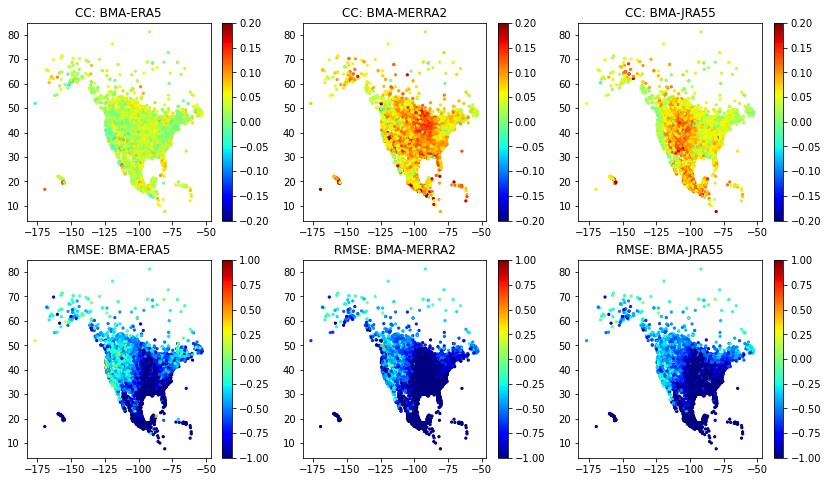

In [13]:
dplot=met_prcp
titles=['BMA-ERA5','BMA-MERRA2','BMA-JRA55']
plt.figure(figsize=[14,8])
for i in range(len(titles)):
    plt.subplot(2,3,i+1)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[3,:,0]-dplot[i,:,0],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([-0.2,0.2])
    plt.title('CC: '+titles[i])
    
    plt.subplot(2,3,i+4)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[3,:,3]-dplot[i,:,3],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([-1,1])
    plt.title('RMSE: '+titles[i])

In [17]:
metmean_prcp = np.zeros([4, 4])
for i in range(4):
    metmean_prcp[i] = np.nanmean(met_prcp[i,:,:],axis=0)
df = pandas.DataFrame(metmean_prcp,['ERA5','MERRA2','JRA55','BMA'],['CC', 'ME', 'MAE', 'RMSE'])
print('Mean metrics')
print(df.round(2))

print('##################################################')
print('##################################################')

metmedian_prcp = np.zeros([4, 4])
for i in range(4):
    metmedian_prcp[i] = np.nanmedian(met_prcp[i,:,:],axis=0)
df = pandas.DataFrame(metmedian_prcp,['ERA5','MERRA2','JRA55','BMA'],['CC', 'ME', 'MAE', 'RMSE'])
print('Median metrics')
print(df.round(2))

Mean metrics
          CC    ME   MAE  RMSE
ERA5    0.53  0.00  2.43  6.78
MERRA2  0.47  0.00  2.58  7.15
JRA55   0.49  0.00  2.58  7.02
BMA     0.56 -0.46  2.15  6.02
##################################################
##################################################
Median metrics
          CC    ME   MAE  RMSE
ERA5    0.54 -0.01  2.34  6.57
MERRA2  0.47 -0.01  2.52  6.94
JRA55   0.50 -0.01  2.45  6.74
BMA     0.57 -0.43  2.05  5.86


## 3.2 Tmean

In [ ]:
dplot=met_tmean
titles=['Raw','QM','Mul_Climo']
plt.figure(figsize=[16,12])
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[i,:,0],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([0.5,1])
    plt.title(titles[i]+' CC')
    
    plt.subplot(3,3,i+4)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[i,:,1],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([-2, 2])
    plt.title(titles[i]+' ME')
    
    plt.subplot(3,3,i+7)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[i,:,3],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([0,4])
    plt.title(titles[i]+' RMSE')

In [ ]:
dplot=met_tmean[[0,2,1],:,:]
titles=['QM-Raw','QM-Mul_Climo']
plt.figure(figsize=[14,10])
for i in range(2):
    plt.subplot(2,2,i+1)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[2,:,0]-dplot[i,:,0],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([-0.01,0.01])
    plt.title('CC: '+titles[i])
    
    plt.subplot(2,2,i+3)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[2,:,3]-dplot[i,:,3],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([-0.5,0.5])
    plt.title('RMSE: '+titles[i])

In [ ]:
metmean_tmean = np.zeros([3, 4])
for i in range(3):
    metmean_tmean[i] = np.nanmean(met_tmean[i,:,:],axis=0)
df = pandas.DataFrame(metmean_tmean,['Raw','QM','Add_Climo'],['CC', 'ME', 'MAE', 'RMSE'])
print('Mean metrics')
print(df.round(2))

print('##################################################')
print('##################################################')

metmedian_tmean = np.zeros([3, 4])
for i in range(3):
    metmedian_tmean[i] = np.nanmedian(met_tmean[i,:,:],axis=0)
df = pandas.DataFrame(metmedian_tmean,['Raw','QM','Add_Climo'],['CC', 'ME', 'MAE', 'RMSE'])
print('Median metrics')
print(df.round(2))

## 3.3 Trange

In [ ]:
dplot=met_trange
titles=['Raw','QM','Mul_Climo']
plt.figure(figsize=[16,12])
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[i,:,0],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([0,1])
    plt.title(titles[i]+' CC')
    
    plt.subplot(3,3,i+4)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[i,:,1],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([-2, 2])
    plt.title(titles[i]+' ME')
    
    plt.subplot(3,3,i+7)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[i,:,3],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([0,6])
    plt.title(titles[i]+' RMSE')

In [ ]:
dplot=met_trange[[0,2,1],:,:]
titles=['QM-Raw','QM-Mul_Climo']
plt.figure(figsize=[14,10])
for i in range(2):
    plt.subplot(2,2,i+1)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[2,:,0]-dplot[i,:,0],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([-0.05,0.05])
    plt.title('CC: '+titles[i])
    
    plt.subplot(2,2,i+3)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[2,:,3]-dplot[i,:,3],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([-0.5,0.5])
    plt.title('RMSE: '+titles[i])

In [ ]:
metmean_trange = np.zeros([3, 4])
for i in range(3):
    metmean_trange[i] = np.nanmean(met_trange[i,:,:],axis=0)
df = pandas.DataFrame(metmean_trange,['Raw','QM','Add_Climo'],['CC', 'ME', 'MAE', 'RMSE'])
print('Mean metrics')
print(df.round(2))

print('##################################################')
print('##################################################')

metmedian_trange = np.zeros([3, 4])
for i in range(3):
    metmedian_trange[i] = np.nanmedian(met_trange[i,:,:],axis=0)
df = pandas.DataFrame(metmedian_trange,['Raw','QM','Add_Climo'],['CC', 'ME', 'MAE', 'RMSE'])
print('Median metrics')
print(df.round(2))

# 4 An example of Quantile Mapping-based correction

### Note: 
(1) This example uses data from all years to calculate emperical cdf (ecdf), but in practice, this is done for each climatological month (1-12).  
(2) In practice, several nearby stations are used in correction, and their QM-based estimates are averaged using distance-based weight, while in this example, only one nearby station is used.  
(3) This objective of this example is to show the QM-based correction is right concerning methodology. This is achieved by: first, carry out QM by ranking reanalysis and observation series from low to high, and realize QM by just finding the corresponding rank; second, compare the estimates in the first step with the outputs from my QM-based program. Results show they are consistent.  
Results show that the QM program is right.

In [ ]:
# example stations
tarID = 0 # target station
nearID = 17 # its nearby  station
print('lat/lon/elev of target station:',stn_lle[tarID,:])
print('lat/lon/elev of nearby station:',stn_lle[nearID,:])
print(' ')
print(' ')

# observation at target/nearby station
d=np.load(file_stn)
prcpstn = d['prcp_stn']
prcp_obs_tar = prcpstn[tarID,365:] # MERRA2 does not have data for the first year
prcp_obs_near = prcpstn[nearID,365:]
del prcpstn, d

# reanalysis at target station
d=np.load('/Users/localuser/Research/EMDNA/downscale/MERRA2_downto_stn_nearest.npz')
prcprea = d['prcp_readown']
prcp_rea_tar = prcprea[tarID,365:] # MERRA2 does not have data for the first year

# start QM-based correction
def empirical_cdf(data, probtar):
    # data: vector of data
    data2 = data[~np.isnan(data)]
    if len(data2) > 0:
        ds = np.sort(data2)
        probreal = np.arange(len(data2)) / (len(data2)+1)
        ecdf_out = np.interp(probtar, probreal, ds)
    else:
        ecdf_out = np.nan * np.zeros(len(probtar))
    return ecdf_out

def cdf_correction(cdf_ref, value_ref, cdf_raw, value_raw, value_tar):
    prob_tar = np.interp(value_tar, value_raw, cdf_raw)
    value_out = np.interp(prob_tar, cdf_ref, value_ref)
    return value_out

ecdf_prob = np.arange(0, 1 + 1 / 500, 1 / 500)
cdf_rea_tar = empirical_cdf(prcp_rea_tar, ecdf_prob)
cdf_obs_near = empirical_cdf(prcp_obs_near, ecdf_prob)
prcp_corr_tar = cdf_correction(ecdf_prob, cdf_obs_near, ecdf_prob, cdf_rea_tar, prcp_rea_tar)

# Example of one day
eday = 100
print('##############################################################################################')
print('A simple test performing QM by ranking reanalysis/observation series without any cdf estimation')
print('##############################################################################################')
print('Example day number is:',eday)
print('prcp_rea_tar for this day is:', prcp_rea_tar[eday])
est1 = np.sort(prcp_rea_tar)
loc1 = np.where(est1==prcp_rea_tar[eday])[0][0]
print('the rank of this value in the reanalysis series is:', loc1,'/',len(est1))
print('its cdf probability is',loc1,'/',len(est1),'=',loc1/len(est1))
est2 = np.sort(prcp_obs_near)
print('the value of prcp_obs_near corresponding to this probability is:',est2[loc1])
print('##############################################################################################')
print('the output from my QM-based correction program is:',prcp_corr_tar[eday])
print('##############################################################################################')
print('This simple test obtains the same value with my current QM program, indicating the QM-based correction is right in method')

# extend this comparison to every day
print(' ')
print(' ')
print(' ')
print(' ')
print('We can do this for everyday, and the scatter plot shows the comparison between estimates from two methods')

prcp_corr_tar2 = np.zeros(len(est1))
for eday in range(len(est1)):
    loci = np.where(est1==prcp_rea_tar[eday])[0][0]
    prcp_corr_tar2[eday] = est2[loci]
plt.scatter(prcp_corr_tar2, prcp_corr_tar)
plt.plot([0,80],[0,80],'r')
plt.ylabel('Estimate from this simple test')
plt.xlabel('Estimate from QM program')

In [ ]:
# evaluate result
print('Evaluation of raw and corrected reanalysis at the target station')
print('Raw CC/ME/MAE/RMSE:', au.metric(prcp_obs_tar, prcp_rea_tar))
print('Corrected CC/ME/MAE/RMSE:', au.metric(prcp_obs_tar, prcp_corr_tar))

In [ ]:
# CDF plot
plt.plot(cdf_rea_tar,ecdf_prob)
plt.plot(cdf_obs_near,ecdf_prob)
plt.legend(['CDF of reanalysis at the target station','CDF of observation at the nearby station'])